<a href="https://colab.research.google.com/github/Mikaral/Matlab-Functions/blob/main/Lista_de_CE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#https://tinyurl.com/26pzqby7
import sys
!git clone https://github.com/edsonportosilva/ElectricCircuits.git
sys.path.insert(0, '/content/ElectricCircuits/Jupyter notebooks/')

Cloning into 'ElectricCircuits'...
remote: Enumerating objects: 1020, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1020 (delta 1), reused 3 (delta 0), pack-reused 1013
Receiving objects: 100% (1020/1020), 130.90 MiB | 20.10 MiB/s, done.
Resolving deltas: 100% (586/586), done.
Checking out files: 100% (318/318), done.


In [3]:
import sympy as sp
import numpy as np
from matplotlib.pyplot import plot as plt
from utils import round_expr, symdisp, symplot
from sympy.polys.partfrac import apart

In [4]:
# funções para auxílio na expansão em frações parciais
def adjustCoeff(expr):    
    coeff = expr.as_numer_denom()
    c0 = sp.poly(coeff[1].cancel()).coeffs()[0]
    
    return (coeff[0].cancel()/c0)/(coeff[1].cancel()/c0)

def partFrac(expr, Ndigits):
    expr = expr.cancel()
    expr = apart(adjustCoeff(expr), s, full=True).doit()
    
    return sp.N(expr, Ndigits)

In [5]:
v = sp.symbols('v')

eq1 = sp.Eq((100-v)/4, v+(v/10))
solution = sp.solve(eq1, v)
print(solution)
i1 = (100-solution[0])/4
print(i1)
v1 = i1*2
print(v1)

[500/27]
550/27
1100/27


In [6]:
X,Y,Z,s = sp.symbols('X, Y, Z, s')

i1 = -(X-(100/s))/2
i2 = (X - Y) / 2
i3 = Y
il1 = (Y-Z)/(0.4*s)
il2 = (Z+1)/(s+10)
ic = (X - (Z + (10/s)))/(4000/s)

eq1 = sp.Eq(i1, i2+ic).simplify()
eq2 = sp.Eq(i2,i3+il1).simplify()
eq3 = sp.Eq(il2,ic+il1).simplify()

In [ ]:
eq1

Eq(X/2 - 50/s, -X/2 + Y/2 - s*(X - Z)/4000 + 1/400)

In [ ]:
eq2

Eq(X/2 - Y/2, (Y*s + 2.5*Y - 2.5*Z)/s)

In [ ]:
eq3

Eq((Z + 1)/(s + 10), (10000.0*Y - 10000.0*Z - s*(s*(-X + Z) + 10))/(4000*s))

In [ ]:
solutionNode = sp.solve([eq1, eq2, eq3], [X,Y,Z], dict=True)[0]

In [ ]:
solutionNode

{X: (294.0*s**3 + 3650.0*s**2 + 4186100.0*s + 32000000.0)/(5.0*s**4 + 71.0*s**3 + 70160.0*s**2 + 540000.0*s),
 Y: (98.0*s**3 + 1460.0*s**2 + 1364500.0*s + 10000000.0)/(5.0*s**4 + 71.0*s**3 + 70160.0*s**2 + 540000.0*s),
 Z: (244.0*s**3 - 17060.0*s**2 + 964500.0*s + 10000000.0)/(5.0*s**4 + 71.0*s**3 + 70160.0*s**2 + 540000.0*s)}

In [ ]:
il1 = il1.subs({X:solutionNode[X],Y:solutionNode[Y],Z:solutionNode[Z]}).simplify()
il2 = il2.subs({X:solutionNode[X],Y:solutionNode[Y],Z:solutionNode[Z]}).simplify()
vc = (solutionNode[X]-solutionNode[Z])

In [ ]:
il1

(-365.0*s**2 + 46300.0*s + 1000000.0)/(s*(5.0*s**3 + 71.0*s**2 + 70160.0*s + 540000.0))

In [ ]:
il2

(5.0*s**3 + 265.0*s**2 + 50450.0*s + 1000000.0)/(s*(5.0*s**3 + 71.0*s**2 + 70160.0*s + 540000.0))

In [ ]:
vc

-(244.0*s**3 - 17060.0*s**2 + 964500.0*s + 10000000.0)/(5.0*s**4 + 71.0*s**3 + 70160.0*s**2 + 540000.0*s) + (294.0*s**3 + 3650.0*s**2 + 4186100.0*s + 32000000.0)/(5.0*s**4 + 71.0*s**3 + 70160.0*s**2 + 540000.0*s)

In [ ]:
i1,i2,i3 = sp.symbols("I_1, I_2, I_3")
m1 = sp.Eq(2*i1 - (100/s) + 2*(i1-i2)+(i1-i3), 0)
m2 = sp.Eq((4000/s)*i2-(0.4*s*(i3-i2))-(2*(i1-i2)) + 10/s, 0)
m3 = sp.Eq((-1*(i1-i3))+(0.4*s*(i3-i2))+((s*i3)-1)+(10*i3), 0)
m1 = m1.simplify()
m2 = m2.simplify()
m3 = m3.simplify()

In [ ]:
solutionMesh = sp.solve([m1,m2,m3], [i1,i2,i3], dict=True)[0]

In [ ]:
solutionMesh

{I_1: (103.0*s**3 + 1725.0*s**2 + 1414950.0*s + 11000000.0)/(5.0*s**4 + 71.0*s**3 + 70160.0*s**2 + 540000.0*s),
 I_2: (5.0*s**2 + 630.0*s + 4150.0)/(5.0*s**3 + 71.0*s**2 + 70160.0*s + 540000.0),
 I_3: (5.0*s**3 + 265.0*s**2 + 50450.0*s + 1000000.0)/(5.0*s**4 + 71.0*s**3 + 70160.0*s**2 + 540000.0*s)}

In [ ]:
vc = ((4000/s)*solutionMesh[i2]+10/s).simplify()
il1 = (solutionMesh[i3]-solutionMesh[i2]).simplify()
il2  = solutionMesh[i3].simplify()

In [ ]:
vc

(50.0*s**3 + 20710.0*s**2 + 3221600.0*s + 22000000.0)/(s*(5.0*s**3 + 71.0*s**2 + 70160.0*s + 540000.0))

In [ ]:
il1

(-365.0*s**2 + 46300.0*s + 1000000.0)/(s*(5.0*s**3 + 71.0*s**2 + 70160.0*s + 540000.0))

In [ ]:
il2

(5.0*s**3 + 265.0*s**2 + 50450.0*s + 1000000.0)/(s*(5.0*s**3 + 71.0*s**2 + 70160.0*s + 540000.0))

In [ ]:
## Calculando as raízes
rootsVc = np.roots([5,71,70160,540000,0])
rootsVc

array([-3.23788596+118.20108187j, -3.23788596-118.20108187j,
       -7.72422809  +0.j        ,  0.          +0.j        ])

In [ ]:
vcFrac = partFrac(vc,2)
#vcFrac = fracParciais(vc, 2)

#vcFrac = partFrac(VC,2).as_ordered_terms()
#il1Frac = partFrac(IL1,2).as_ordered_terms()
#il2Frac = partFrac(IL2,2).as_ordered_terms()
#symdisp('Vc(s) = ',vcFrac, 'Vs')
#symdisp('I_{L1}(s) = ',IL1_, 'As')
#symdisp('I_{L2}(s) = ',IL2_, 'As')

(-17.0 + 17.0*I)/(s + 3.2 + 1.2e+2*I) + (-17.0 - 17.0*I)/(s + 3.2 - 1.2e+2*I) + 3.1/(s + 7.7) + 41.0/s

## 1.f - Gere of gráficos das curvas das funções obtidas no item d.

### Gráfico de Vc(t)

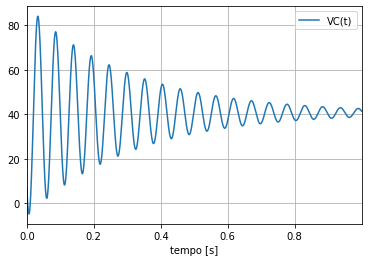

In [ ]:
t = sp.symbols('t', real=True)
vct = (40.741 + sp.exp(-7.72*t)+(2*sp.exp(-3.24*t)*(-16.92*sp.cos(118.2*t)-16.56*sp.sin(118.2*t))))*sp.Heaviside(t)
symplot(t,vct,np.arange(0,1,.0001),'VC(t)')

#### Gráfico de IL1(t)

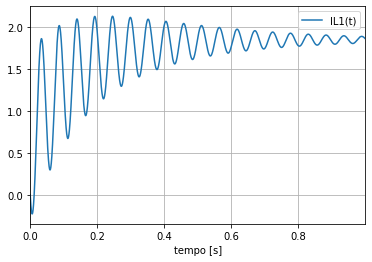

In [ ]:
il1t = (1.85 - 1.15*sp.exp(-7.72*t)+(2*sp.exp(-3.24*t)*(-0.35*sp.cos(118.2*t)-0.36*sp.sin(118.2*t))))*sp.Heaviside(t)
symplot(t,il1t,np.arange(0,1,.0001),'IL1(t)')

#### Gráfico de IL2(t)

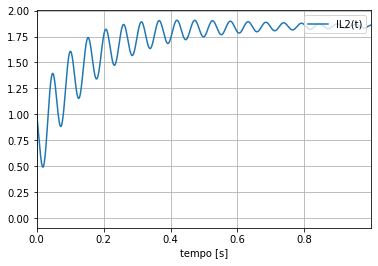

In [ ]:
il2t = (1.85 - 1.15*sp.exp(-7.72*t)+(2*sp.exp(-3.24*t)*(0.15*sp.cos(118.2*t)-0.13*sp.sin(118.2*t))))*sp.Heaviside(t)
symplot(t,il2t,np.arange(0,1,.0001),'IL2(t)')

## 1.g Simule o circuito da figura 1 no Falstad e compare as curvas observadas com os resultados obtidos no item d.

Gráfico de Vc(t) no Falstad

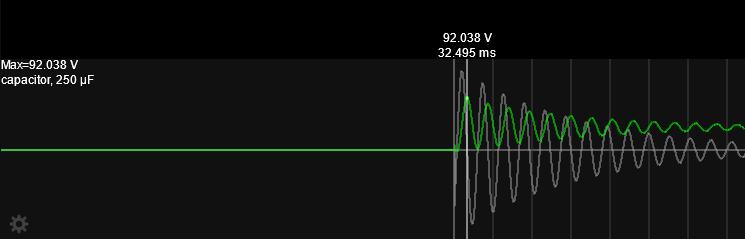

Gráfico de IL1(t) no Falstad

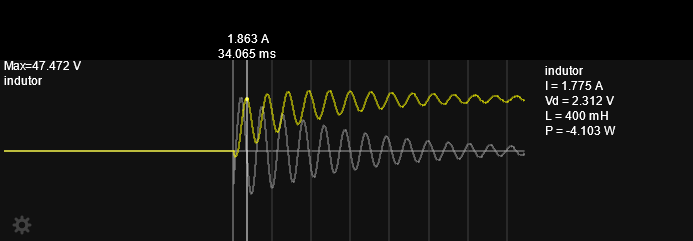

Gráfico de IL2(t) no Falstad

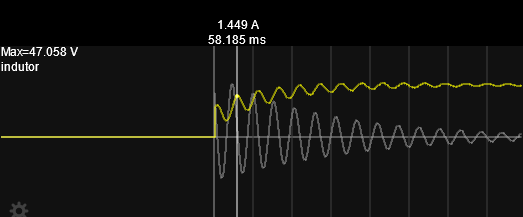

### Conclusão

Apesar das escalas estarem um pouco diferente dos gráficos plotados na letra f, percebemos que os valores de picos são consistentes entre os gráficos.

# Questão 2

### Calculando a contribuição de Va

In [68]:
Va, Vb, Vn, Vna, s, Ia, Il, Ila, Ic = sp.symbols('V_a, V_b, V_n, V_n_, s, I_a, I_l, I_l_, I_c')

Ia = ((Va/s) - Vn)/(0.5*(s))
Il = Vn/(2+0.5*s)
Ic = (s*Vn)/4000

eq1 = sp.Eq(Ia, Il + Ic)
eq1 = eq1.subs({Va:20})
sol1 = sp.solve(eq1, Vn, dict=True)[0]

Vna = sol1[Vn]
Ila = Il.subs({Vn:Vna})

In [70]:
Vna = Vna.simplify()
Vna

(160000.0*s + 640000.0)/(s*(s**3 + 4.0*s**2 + 16000.0*s + 32000.0))

In [51]:
Ib, Vnb, Vc2 = sp.symbols('I_l__, V_n__, V_c__')

Ib = (-s*Vn)/(0.5*(s**2))
Il = Vn/(2+0.5*s)
Ic = ((s*Vn)-Vb)/4000

eq2 = sp.Eq(Ib, Il + Ic)
eq2 = eq2.subs({Vb:10})
sol2 = sp.solve(eq2, Vn, dict=True)[0]

Vnb = sol2[Vn]
Ilb = Il.subs({Vn:Vnb})
Ilb.simplify()
Vc2 = (Ic*(4000/s)).subs({Vn:Vnb, Vb:10})
Ilb.simplify()

10.0*s/(0.5*s**3 + 2.0*s**2 + 8000.0*s + 16000.0)

In [71]:
Vnb = Vnb.simplify()
Vnb

10.0*s*(s + 4.0)/(s**3 + 4.0*s**2 + 16000.0*s + 32000.0)

In [49]:
Vc2.simplify()

-(160000.0*s + 320000.0)/(s*(1.0*s**3 + 4.0*s**2 + 16000.0*s + 32000.0))

In [57]:
Ila = Ila.simplify()
Ila

160000.0/(s*(0.5*s**3 + 2.0*s**2 + 8000.0*s + 16000.0))

In [61]:
Ilb = Ilb.simplify()
Ilb

10.0*s/(0.5*s**3 + 2.0*s**2 + 8000.0*s + 16000.0)

In [62]:
Il = Ila + Ilb
Il.simplify()
Il.cancel()

(10.0*s**2 + 160000.0)/(0.5*s**4 + 2.0*s**3 + 8000.0*s**2 + 16000.0*s)

In [72]:
Vc = Vna + Vc2
Vc.simplify()
Vc.cancel()

320000.0/(1.0*s**4 + 4.0*s**3 + 16000.0*s**2 + 32000.0*s)